In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


# Merge excel files
path = "datasets/output/data_cleaned.xlsx"

dataset_df = pd.read_excel(path)

In [116]:
dataset_df = dataset_df[['CCAN', 'DATE', 'Status', 'TOT NET', 'Net Investment', '31-60', '61-90', '91-120', '120+', 'Past Due', 'Aging', 'Country']]

dataset_df.count()

CCAN              140236
DATE              140236
Status            140236
TOT NET           140236
Net Investment    140236
31-60             140236
61-90             140236
91-120            140236
120+              140236
Past Due          140236
Aging             140236
Country           140236
dtype: int64

In [117]:
# Count number of months as input
input_files = os.listdir("datasets/input/")
input_count = len(input_files)

# Create average per month past due and in millions per month
extended_dataset_df = dataset_df
extended_dataset_df["Past Due AVG"] = round(extended_dataset_df["Past Due"] / input_count, 2)
extended_dataset_df["Past Due AVG MLN"] = round(extended_dataset_df["Past Due AVG"] / 1000000, 2)
extended_dataset_df["Net Investment AVG"] = round(extended_dataset_df["Net Investment"] / input_count, 2)
extended_dataset_df["Net Investment AVG MLN"] = round(extended_dataset_df["Net Investment AVG"] / 1000000, 2)
extended_dataset_df["Year"] = pd.DatetimeIndex(extended_dataset_df['DATE']).year

extended_dataset_df.head()

,CCAN,DATE,Status,TOT NET,Net Investment,31-60,61-90,91-120,120+,Past Due,Aging,Country,Past Due AVG,Past Due AVG MLN,Net Investment AVG,Net Investment AVG MLN,Year
0,320023,2016-01-01,LEGAL,1.534098e+09,15555962.86,0.00,0.00,0.00,15555962.86,15555962.86,120+,MEXICO,204683.72,0.20,204683.72,0.20,2016
1,315112,2016-01-01,LEGAL,1.534098e+09,3265682.10,0.00,0.00,0.00,3265682.10,3265682.10,120+,MEXICO,42969.50,0.04,42969.50,0.04,2016
2,309348,2016-01-01,REGULAR,1.534098e+09,3006305.90,0.00,356160.13,1678580.73,971565.04,3006305.90,120+,COSTA RICA,39556.66,0.04,39556.66,0.04,2016
3,320248,2016-01-01,REGULAR,1.534098e+09,2874745.56,0.00,1191181.78,1683563.78,0.00,2874745.56,91-120,MEXICO,37825.60,0.04,37825.60,0.04,2016
4,308247,2016-01-01,REGULAR,1.534098e+09,2556572.66,729813.89,0.00,1826758.77,0.00,2556572.66,91-120,GUATEMALA,33639.11,0.03,33639.11,0.03,2016


In [118]:
input_count

76

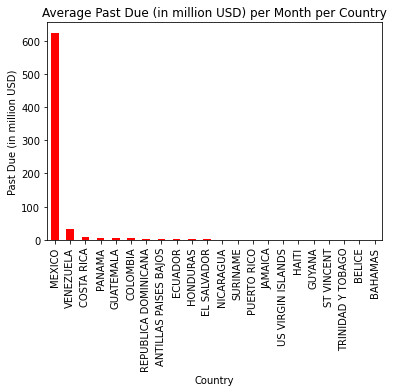

In [119]:
# Calculate average Past Due in million USD per month per country
country_count = extended_dataset_df.groupby(["Country"])["Past Due AVG MLN"].sum()

# Plot bar graph
country_count = country_count.sort_values(ascending=False)
country_count.plot(kind="bar", facecolor="red")

plt.ylabel("Past Due (in million USD)")
plt.xlabel("Country")
plt.title("Average Past Due (in million USD) per Month per Country")
plt.show()

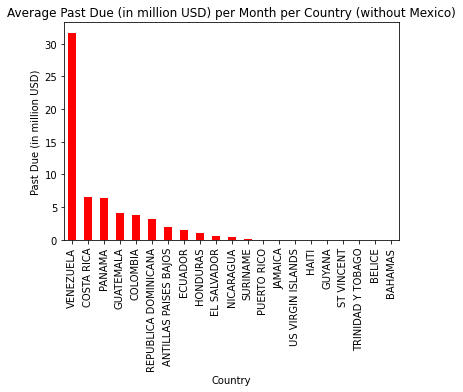

In [120]:
# Get dataset without Mexico
ext_dat_nomx_df = extended_dataset_df.loc[(extended_dataset_df["Country"] != 'MEXICO')].dropna()

# Calculate average Past Due in USD per month per country
country_count2 = ext_dat_nomx_df.groupby(["Country"])["Past Due AVG MLN"].sum()
country_count2 = country_count2.sort_values(ascending=False)
country_count2.plot(kind="bar", facecolor="red")

plt.ylabel("Past Due (in million USD)")
plt.xlabel("Country")
plt.title("Average Past Due (in million USD) per Month per Country (without Mexico)")
plt.show()                                        
                                          

In [121]:
# Count length of unique customers

customers = extended_dataset_df['CCAN']
set_cust = set(customers)
uni_cust = len(set_cust)

uni_cust

6119

In [122]:
years = extended_dataset_df["Year"].unique().tolist()

years

[2016, 2015, 2014, 2017, 2018, 2019, 2020]

In [134]:
def year_overview(yearyear):
    year_df = extended_dataset_df.loc[(extended_dataset_df["Year"] == yearyear)].dropna()
    # Group by customer
    customer_gbdf = year_df.groupby(['CCAN'])
    #customer_gbdf = extended_dataset_df.groupby(['CCAN'])

    #customer_gbdf = customer_gbdf[['CCAN', 'Net Investment AVG MLN']]

    # Past Due Count
    cust_pd_count = customer_gbdf['Net Investment AVG MLN'].sum()
    cust_country = customer_gbdf['Country'].unique().str[0]

    #summary table
    sum_cust_pd_df = pd.DataFrame({
            "Net Investment AVG MLN":cust_pd_count,
            "Country":cust_country})
    sum_cust_pd_df.index.name="CCAN"

    sum_cust_pd_df = sum_cust_pd_df.reset_index()
    # Filter top four countries out of DF
    sum_cust_pd_df = sum_cust_pd_df.loc[((sum_cust_pd_df["Country"] == 'MEXICO') | (sum_cust_pd_df["Country"] == 'VENEZUELA')
                                         | (sum_cust_pd_df["Country"] == 'COSTA RICA') | (sum_cust_pd_df["Country"] == 'PANAMA')
                                        )].dropna()


    # get dataframe sorted by life Expectancy in each continent 
    top_net_inv = sum_cust_pd_df.groupby(["Country"]).apply(lambda x: x.sort_values(["Net Investment AVG MLN"], ascending = False)).reset_index(drop=True)
    # select top N rows within each continent
    top_net_inv = top_net_inv.groupby('Country').head(2)
    #number = year
    
    #print("Top two NET Investment per country in year: ")
    #x = top_net_inv['Country']
    #x_value = top_net_inv['CCAN']
    #y_value = top_net_inv['Net Investment AVG MLN']
    #colour = 
    #top_net_inv.plot.bar(x_value,y_value, rot=0)

    

In [135]:
year_overview(2014)
print("Top two NET Investment per country in 2014:")
top_net_inv

Top two NET Investment per country in 2014:


,CCAN,Net Investment AVG MLN,Country
0,314798,5.85,COSTA RICA
1,314376,4.14,COSTA RICA
446,309306,31.47,MEXICO
447,309306,6.84,MEXICO
2411,320134,3.04,PANAMA
2412,313740,2.56,PANAMA
2950,317746,11.51,VENEZUELA
2951,R-82,1.35,VENEZUELA


In [136]:
year_overview(2015)
print("Top two NET Investment per country in 2015:")
top_net_inv

Top two NET Investment per country in 2015:


,CCAN,Net Investment AVG MLN,Country
0,314798,5.85,COSTA RICA
1,314376,4.14,COSTA RICA
446,309306,31.47,MEXICO
447,309306,6.84,MEXICO
2411,320134,3.04,PANAMA
2412,313740,2.56,PANAMA
2950,317746,11.51,VENEZUELA
2951,R-82,1.35,VENEZUELA


In [125]:
year_df = extended_dataset_df.loc[(extended_dataset_df["Year"] == 2015)].dropna()
# Group by customer
customer_gbdf = year_df.groupby(['CCAN'])
#customer_gbdf = extended_dataset_df.groupby(['CCAN'])

#customer_gbdf = customer_gbdf[['CCAN', 'Net Investment AVG MLN']]

# Past Due Count
cust_pd_count = customer_gbdf['Net Investment AVG MLN'].sum()
cust_country = customer_gbdf['Country'].unique().str[0]

#summary table
sum_cust_pd_df = pd.DataFrame({
          "Net Investment AVG MLN":cust_pd_count,
          "Country":cust_country})
sum_cust_pd_df.index.name="CCAN"

sum_cust_pd_df = sum_cust_pd_df.reset_index()
# Filter top four countries out of DF
sum_cust_pd_df = sum_cust_pd_df.loc[((sum_cust_pd_df["Country"] == 'MEXICO') | (sum_cust_pd_df["Country"] == 'VENEZUELA')
                                      | (sum_cust_pd_df["Country"] == 'COSTA RICA') | (sum_cust_pd_df["Country"] == 'PANAMA')
                                     )].dropna()


# get dataframe sorted by life Expectancy in each continent 
top_net_inv = sum_cust_pd_df.groupby(["Country"]).apply(lambda x: x.sort_values(["Net Investment AVG MLN"], ascending = False)).reset_index(drop=True)
# select top N rows within each continent
top_net_inv = top_net_inv.groupby('Country').head(2)
#number = year
    
#print("Top two NET Investment per country in year: ")
#x = top_net_inv['Country']
#x_value = top_net_inv['CCAN']
#y_value = top_net_inv['Net Investment AVG MLN']
#colour = 
#top_net_inv.plot.bar(x_value,y_value, rot=0)

top_net_inv

,CCAN,Net Investment AVG MLN,Country
0,314798,4.96,COSTA RICA
1,314376,2.42,COSTA RICA
190,309306,16.55,MEXICO
191,312097,13.72,MEXICO
1412,313740,5.90,PANAMA
1413,320134,4.06,PANAMA
1665,317746,12.62,VENEZUELA


In [126]:
year_df = extended_dataset_df.loc[(extended_dataset_df["Year"] == 2016)].dropna()
# Group by customer
customer_gbdf = year_df.groupby(['CCAN'])
#customer_gbdf = extended_dataset_df.groupby(['CCAN'])

#customer_gbdf = customer_gbdf[['CCAN', 'Net Investment AVG MLN']]

# Past Due Count
cust_pd_count = customer_gbdf['Net Investment AVG MLN'].sum()
cust_country = customer_gbdf['Country'].unique().str[0]

#summary table
sum_cust_pd_df = pd.DataFrame({
          "Net Investment AVG MLN":cust_pd_count,
          "Country":cust_country})
sum_cust_pd_df.index.name="CCAN"

sum_cust_pd_df = sum_cust_pd_df.reset_index()
# Filter top four countries out of DF
sum_cust_pd_df = sum_cust_pd_df.loc[((sum_cust_pd_df["Country"] == 'MEXICO') | (sum_cust_pd_df["Country"] == 'VENEZUELA')
                                      | (sum_cust_pd_df["Country"] == 'COSTA RICA') | (sum_cust_pd_df["Country"] == 'PANAMA')
                                     )].dropna()


# get dataframe sorted by life Expectancy in each continent 
top_net_inv = sum_cust_pd_df.groupby(["Country"]).apply(lambda x: x.sort_values(["Net Investment AVG MLN"], ascending = False)).reset_index(drop=True)
# select top N rows within each continent
top_net_inv = top_net_inv.groupby('Country').head(2)
#number = year
    
#print("Top two NET Investment per country in year: ")
#x = top_net_inv['Country']
#x_value = top_net_inv['CCAN']
#y_value = top_net_inv['Net Investment AVG MLN']
#colour = 
#top_net_inv.plot.bar(x_value,y_value, rot=0)

top_net_inv

,CCAN,Net Investment AVG MLN,Country
0,314798,7.56,COSTA RICA
1,314376,4.21,COSTA RICA
204,309306,23.16,MEXICO
205,316076,7.87,MEXICO
1414,320134,5.55,PANAMA
1415,313740,5.12,PANAMA
1693,317746,16.00,VENEZUELA
